In [133]:
from __future__ import division, absolute_import

import sys
import os
import numpy as np
import random
import pickle
from plotnine import *
import math

import pandas as pd

#root
absPath = '/home/angela3/imbalance_pcm_benchmark/'
sys.path.insert(0, absPath)

from src.imbalance_functions import * 

np.random.seed(8)
random.seed(8)

In [81]:
#LOADING DATA 
activity_filename = "/home/angela3/hybrid_model/data/smiles_prots_activity.csv"
activity_df = pd.read_csv(activity_filename, sep="\t", header=0).drop("Unnamed: 0", axis=1)

In [82]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829033 entries, 0 to 829032
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DeepAffinity Protein ID   829033 non-null  object 
 1   Uniprot ID                767999 non-null  object 
 2   DeepAffinity Compound ID  829033 non-null  object 
 3   CID                       829033 non-null  int64  
 4   activity                  829033 non-null  float64
 5   label                     829033 non-null  float64
 6   Canonical SMILE           829033 non-null  object 
 7   Sequence                  829033 non-null  object 
 8   family                    829033 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 56.9+ MB


In [83]:
activity_df.groupby("family")["DeepAffinity Protein ID"].nunique()

family
CY                51
GPCR             498
IC               191
NR                82
Non assigned    3656
OE               361
PK               490
PR               319
TR               183
Name: DeepAffinity Protein ID, dtype: int64

In [84]:
family_names = activity_df["family"].unique().tolist()

In [85]:
figures = {}
for family in family_names:
    print("Protein family: ", family)
    activity_fam = activity_df[activity_df.family == family]
    unique_prots = activity_fam["DeepAffinity Protein ID"].drop_duplicates().tolist()
    print("There are",len(unique_prots),"different proteins")
    list_ratios = []
    for prot in unique_prots:
        ratio_actives_inactives = computing_active_inactive_ratio(activity_fam, prot)
        dicti = {"DeepAffinity Protein ID" : prot, "ratio_actives_inactives": ratio_actives_inactives}
        list_ratios.append(dicti)
    df_ratios = pd.DataFrame(list_ratios)
    p = (ggplot(df_ratios, aes("ratio_actives_inactives")) + geom_histogram() 
         + xlab("Proportion of actives respect to all the interactions per protein") + ggtitle(family))    
    figures[family] = p

Protein family:  PK
There are 490 different proteins
Protein family:  GPCR
There are 498 different proteins
Protein family:  NR
There are 82 different proteins
Protein family:  Non assigned
There are 3656 different proteins
Protein family:  OE
There are 361 different proteins
Protein family:  IC
There are 191 different proteins
Protein family:  TR
There are 183 different proteins
Protein family:  CY
There are 51 different proteins
Protein family:  PR
There are 319 different proteins


In [96]:
print("Family: PK")
figures["PK"]
ggsave(plot=figures["PK"], 
       filename="".join((absPath, "data/kinases/histogram_ratio_kinases.pdf")), device = "pdf")

Family: PK


/home/angela3/venv/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/angela3/venv/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/angela3/imbalance_pcm_benchmark/data/kinases/histogram_ratio_kinases.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


In [97]:
print("Family: GPCR")
figures["GPCR"]
ggsave(plot=figures["GPCR"], 
       filename="".join((absPath, "data/GPCRs/histogram_ratio_gpcrs.pdf")), device = "pdf")

Family: GPCR


/home/angela3/venv/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/angela3/venv/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/angela3/imbalance_pcm_benchmark/data/GPCRs/histogram_ratio_gpcrs.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


Family: NR


/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


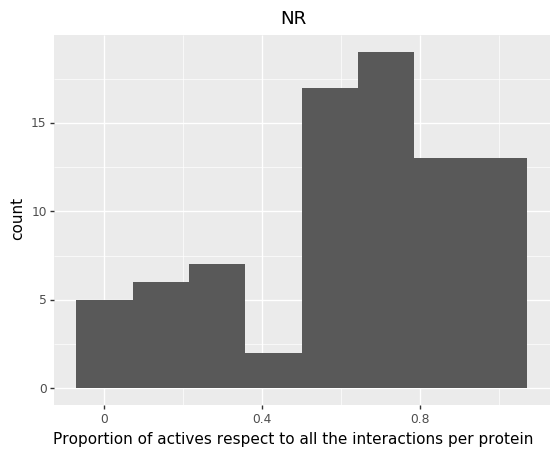

<ggplot: (-9223363258716668861)>

In [88]:
print("Family: NR")
figures["NR"]

Family: Non assigned


/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 9'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


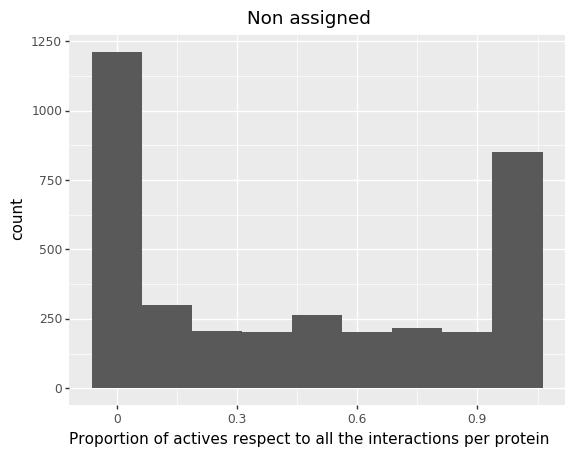

<ggplot: (8778138106895)>

In [89]:
print("Family: Non assigned")
figures["Non assigned"]

Family: OE


/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


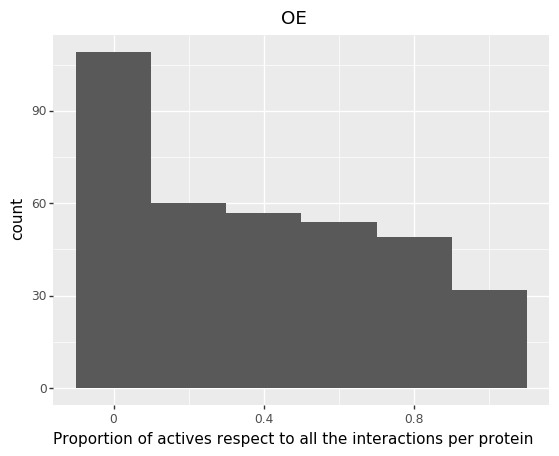

<ggplot: (8778148684187)>

In [90]:
print("Family: OE")
figures["OE"]

Family: IC


/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


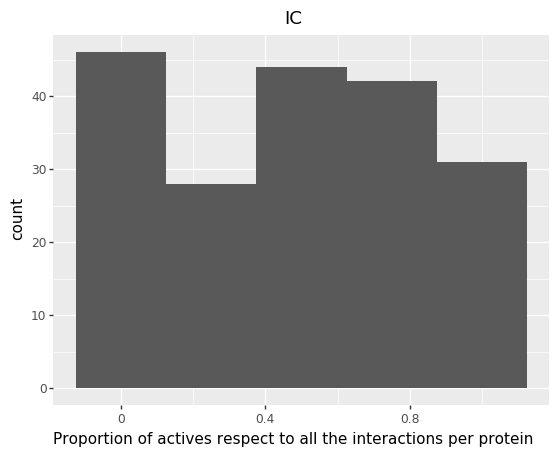

<ggplot: (8778148684278)>

In [91]:
print("Family: IC")
figures["IC"]

Family: TR


/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


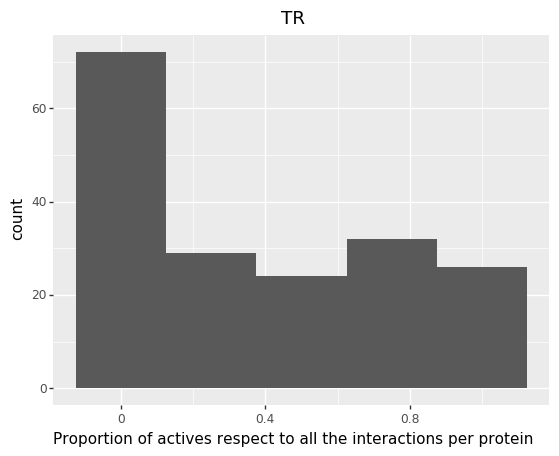

<ggplot: (8778138107782)>

In [92]:
print("Family: TR")
figures["TR"]

Family: CY


/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 4'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


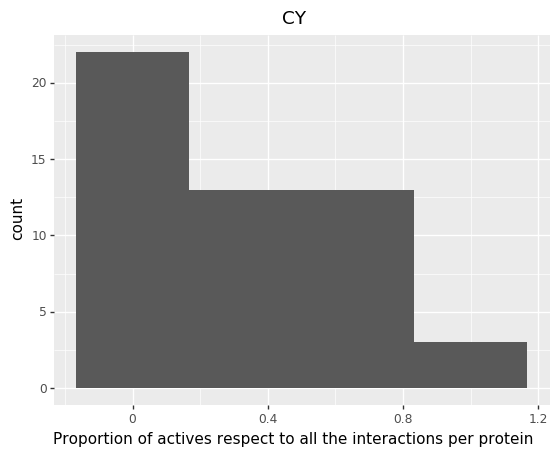

<ggplot: (8778138107887)>

In [93]:
print("Family: CY")
figures["CY"]

Family: PR


/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 7'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


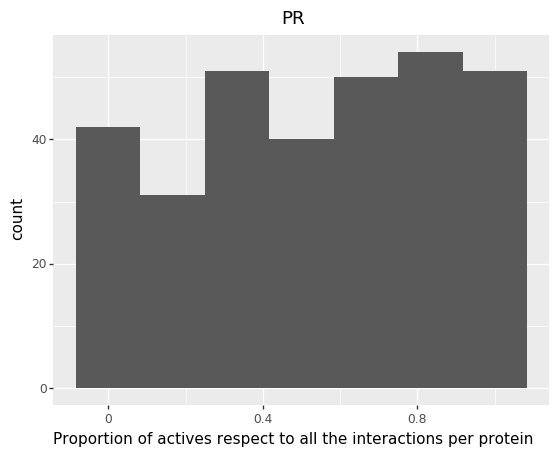

<ggplot: (-9223363258706091597)>

In [94]:
print("Family: PR")
figures["PR"]

## Imbalance per protein 

In [144]:
protein_family = "PK" #"GPCR" #
protein_name = "kinases" #"GPCRs" #

# keeping only the protein family
activity_sub = activity_df[activity_df.family == protein_family]

activity_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129997 entries, 0 to 824347
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DeepAffinity Protein ID   129997 non-null  object 
 1   Uniprot ID                129997 non-null  object 
 2   DeepAffinity Compound ID  129997 non-null  object 
 3   CID                       129997 non-null  int64  
 4   activity                  129997 non-null  float64
 5   label                     129997 non-null  float64
 6   Canonical SMILE           129997 non-null  object 
 7   Sequence                  129997 non-null  object 
 8   family                    129997 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 9.9+ MB


In [145]:
activity_sub.head()

,DeepAffinity Protein ID,Uniprot ID,DeepAffinity Compound ID,CID,activity,label,Canonical SMILE,Sequence,family
0,DP71,P11275,c6f3,5330796,7.154902,1.0,C1=CC=C2C(=C1)C3=C4C(=C5C6=C(C=CC(=C6)Br)NC5=C...,MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINT...,PK
1,DP71,P11275,8byu,5330766,6.278189,1.0,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4CCNCCO)C=C(C=...,MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINT...,PK
2,DP71,P11275,wjw8,5330767,5.931814,0.0,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4CCNC6CCC(CC6)...,MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINT...,PK
3,DP71,P11275,akod,5330768,5.515700,0.0,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4CCCN6CCC(CC6)...,MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINT...,PK
4,DP71,P11275,vy7z,5330769,5.504456,0.0,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4CCCN6CCC(CC6)...,MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINT...,PK


In [146]:
label_count_subprot = pd.DataFrame(activity_sub[["DeepAffinity Protein ID", "label"]].groupby(["DeepAffinity Protein ID", "label"]).size()).reset_index()

label_count_subprot.head()

,DeepAffinity Protein ID,label,0
0,0AXF,0.0,8
1,0AXF,1.0,17
2,0BBQ,0.0,10
3,0BBQ,1.0,29
4,0BYT,0.0,251


In [147]:
label_count_subprot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DeepAffinity Protein ID  921 non-null    object 
 1   label                    921 non-null    float64
 2   0                        921 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 21.7+ KB


In [148]:
label_count_subprot.columns = ['DeepAffinity Protein ID', 'label', "number"]

In [149]:
#Filling the count label dataframe

for prot in label_count_subprot["DeepAffinity Protein ID"].unique().tolist():
    labels = [0, 1]
    subprot = label_count_subprot[label_count_subprot["DeepAffinity Protein ID"] == prot]
    #print(subprot.shape[0])
    if subprot.shape[0]==2:
        continue
    else:
        nomissing_label = subprot[["label"]].values
        missing_label = [i for i in labels if i!=nomissing_label][0]
        row_dict = {"DeepAffinity Protein ID": prot, "label": missing_label, "number":0}
        label_count_subprot = label_count_subprot.append(row_dict, ignore_index=True)

In [150]:
label_count_subprot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DeepAffinity Protein ID  980 non-null    object 
 1   label                    980 non-null    float64
 2   number                   980 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.1+ KB


In [151]:
label_count_subprot.sort_values("DeepAffinity Protein ID")

,DeepAffinity Protein ID,label,number
0,0AXF,0.0,8
1,0AXF,1.0,17
2,0BBQ,0.0,10
3,0BBQ,1.0,29
4,0BYT,0.0,251
...,...,...,...
916,ZXO3,1.0,18
917,ZYFI,0.0,2
918,ZYFI,1.0,4
920,ZZXK,1.0,5


In [152]:
p = (ggplot(label_count_subprot, aes(x="factor(label)", y="number")) 
 + geom_boxplot() + ylab("Number of interactions")
 + xlab("Labels") + theme(legend_title=element_blank())
+ ggtitle(protein_name) 
 #+ scale_y_log10()
)

p

ggsave(plot=p, 
       filename="".join((absPath, "data/", protein_name, "/boxplot_ninteractions.pdf")), device = "pdf")

/home/angela3/venv/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/angela3/venv/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /home/angela3/imbalance_pcm_benchmark/data/kinases/boxplot_ninteractions.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


### Exporting CSV for a protein family

In [154]:
protein_family = "GPCR" #"PK"
protein_name = "GPCRs" #"kinases"

In [155]:
# keeping only the protein family
activity_sub = activity_df[activity_df.family == protein_family]

unique_prots = activity_sub["DeepAffinity Protein ID"].unique().tolist()

activity_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200523 entries, 32 to 828913
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DeepAffinity Protein ID   200523 non-null  object 
 1   Uniprot ID                200523 non-null  object 
 2   DeepAffinity Compound ID  200523 non-null  object 
 3   CID                       200523 non-null  int64  
 4   activity                  200523 non-null  float64
 5   label                     200523 non-null  float64
 6   Canonical SMILE           200523 non-null  object 
 7   Sequence                  200523 non-null  object 
 8   family                    200523 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 15.3+ MB


In [156]:
activity_sub["label"].value_counts()

1.0    153993
0.0     46530
Name: label, dtype: int64

In [158]:
print("There are", activity_sub.shape[0], "protein-compound pairs available in ", protein_name)

There are 200523 protein-compound pairs available in  GPCRs


In [18]:
#Saving final dataset to a csv
output_filename = "".join((absPath, "data/", protein_name, "_activity.csv"))
activity_sub.to_csv(output_filename, sep="\t", header=True)

In [157]:
unique_prots = activity_sub["DeepAffinity Protein ID"].unique().tolist()

In [20]:
unique_prots

['UYMO',
 '0BJE',
 '78TA',
 'RJYX',
 '95E2',
 'P59Q',
 'XY2A',
 '3Y9A',
 'J6QF',
 'I8AL',
 'K1O5',
 'Q6RX',
 'L3MG',
 '5W5R',
 '3KD1',
 'MUMW',
 'SH36',
 '2CH1',
 'TOAR',
 'F5KQ',
 'N0SR',
 '230E',
 'OYY9',
 '7WTN',
 '8VB1',
 'CVFR',
 'LETU',
 'LFAB',
 'C0XK',
 'DFO0',
 '1ZXI',
 'SXV6',
 'DPHN',
 'ZALS',
 'Y9QF',
 'YO6L',
 '3Y7S',
 '5GL1',
 'NXHT',
 'JVOZ',
 '4C54',
 '06WU',
 '662N',
 'ES23',
 'KPOO',
 'DFF0',
 'CFPC',
 'SPT7',
 'HSYO',
 'FESF',
 'FFXN',
 '1AZF',
 '5N4X',
 'G8ER',
 'SG15',
 '2SAM',
 '8PJC',
 'TBTI',
 '4BF3',
 'DCP7',
 'XTZC',
 'VX88',
 'V31H',
 '8ZJZ',
 'OG3W',
 '33X9',
 '69Q1',
 'SVAL',
 'OBT5',
 '3QL2',
 '7V1X',
 '1MWP',
 'IAKH',
 'DU8D',
 'FFCA',
 '4SAW',
 'ZG4W',
 '9FAD',
 'K90C',
 'CJWT',
 'SJGF',
 'LTX5',
 'V27B',
 'QZ2G',
 'RPPN',
 'C0L6',
 '5K6Y',
 'IE5U',
 'YVNY',
 '3WO1',
 'S982',
 'YT4M',
 'DLLJ',
 'MAYC',
 '79FS',
 'BDHY',
 'SKZW',
 '8L6X',
 'OTEJ',
 '5T8S',
 'KOPG',
 '3DQ7',
 'H5E4',
 '5NBB',
 '00QN',
 'JB1G',
 'WP5M',
 'L0SK',
 'JC99',
 '7ODP',
 'MQ2W',
 

In [159]:
len(unique_prots)

498

In [160]:
unique_comps = activity_sub["DeepAffinity Compound ID"].unique().tolist()
len(unique_comps)

120906

In [21]:
#unique_prots_str = [prot.encode("utf-8") for prot in unique_prots]
#unique_prots_str[:3]

In [23]:
with open("".join((absPath, "data/", protein_name, "/", protein_name, "_prots.pickle")), 'wb') as handle:
    pickle.dump(unique_prots, handle)